<a href="https://colab.research.google.com/github/HinaNitano/EU_M_Math/blob/main/Chap09_Hw_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 9-2-4

In [2]:
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series, DataFrame
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import sklearn

%precision 3

'%.3f'

In [6]:
from sklearn.cluster import KMeans

from sklearn.datasets import make_blobs

X,_ = make_blobs(random_state=10)

In [7]:
# KMeansクラスの初期化
kmeans = KMeans(init='random', n_clusters=3)

# クラスターの重心を計算
kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(init='random', n_clusters=3)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'Distortion')

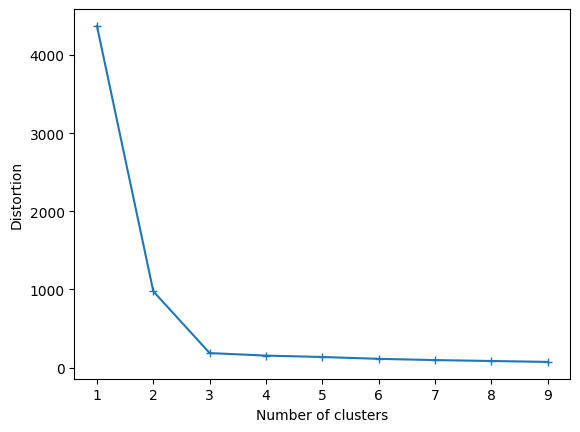

In [8]:
dist_list = []
for i in range(1,10):
  kmeans = KMeans(n_clusters=i, init='random', random_state=0)
  kmeans.fit(X)
  dist_list.append(kmeans.inertia_)

plt.plot(range(1,10), dist_list, marker='+')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')

In [30]:
import requests, zipfile
import io

url = 'https://archive.ics.uci.edu/static/public/222/bank+marketing.zip'

res = requests.get(url).content

z = zipfile.ZipFile(io.BytesIO(res))
z.extractall()

In [26]:
ls

bank-additional.zip  bank.zip  sample_data/


In [33]:
# ZIP ファイルのパス
zip_path = 'bank.zip'

# ZIP ファイルの解凍
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
  zip_ref.extractall()

In [32]:
ls

bank-additional.zip  bank.csv  bank-full.csv  bank-names.txt  bank.zip  sample_data/


In [34]:
bank = pd.read_csv('bank-full.csv', sep=';')

bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [36]:
from sklearn.preprocessing import StandardScaler

# データ列の絞り込み
bank_sub = bank[['age','balance', 'campaign', 'previous']]

# 標準化
sc = StandardScaler()
sc.fit(bank_sub)
bank_sub_std = sc.transform(bank_sub)
bank_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       45211 non-null  int64
 1   balance   45211 non-null  int64
 2   campaign  45211 non-null  int64
 3   previous  45211 non-null  int64
dtypes: int64(4)
memory usage: 1.4 MB


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

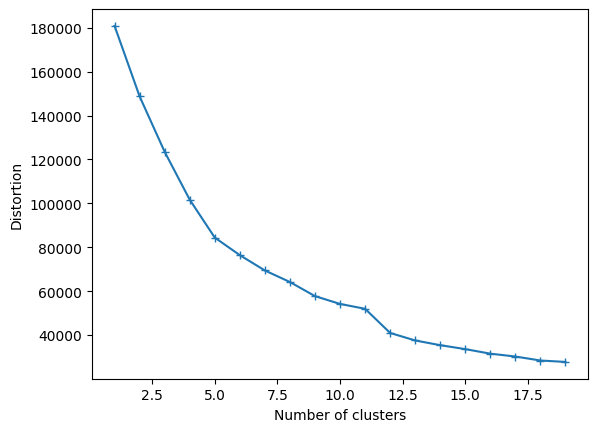

In [37]:
dist_list = []
for i in range(1,20):
  kmeans = KMeans(n_clusters=i, init='random', random_state=0)
  kmeans.fit(bank_sub_std)
  dist_list.append(kmeans.inertia_)

plt.plot(range(1,20), dist_list, marker='+')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()